In [1]:
import pandas as pd
rotten_tomatoes_sample = pd.read_csv('critic_reviews_2010_to_2012.csv')
rotten_tomatoes_sample

,Unnamed: 0,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2/6/2010,A fantasy adventure that fuses Greek mythology...
1,1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2/6/2010,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2/9/2010,With a top-notch cast and dazzling special eff...
3,3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2/9/2010,Whether audiences will get behind The Lightnin...
4,4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2/10/2010,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...,...
142984,1048570,m/tourist,Robert W. Butler,False,Kansas City Star,Rotten,1.5/4,12/10/2010,"The Tourist is memorable for one thing, at lea..."
142985,1048571,m/tourist,Fred Topel,False,Screen Junkies,Fresh,NaN,12/10/2010,"It's formulaic, but all the elements are in th..."
142986,1048572,m/tourist,John Beifuss,False,"Commercial Appeal (Memphis, TN)",Rotten,4-Feb,12/10/2010,Johnny Depp is such a talented chameleon that ...
142987,1048573,m/tourist,Tom Long,True,Detroit News,Rotten,NaN,12/10/2010,Jolie! Depp! Romantic locations! Intrigue! Som...


In [3]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [3]:
from tensorflow.keras import utils
X = rotten_tomatoes_sample['review_content']
X = X.apply(str)

# replace elements so that the algorithm can more easily understand words
X = [ele.replace('"', '') for ele in X]
X = [ele.replace(',', '') for ele in X]
X = [ele.replace('.', '') for ele in X]
X = [ele.replace(':', '') for ele in X]
X = [ele.replace("'s", " ") for ele in X]
X = [ele.replace("'", "") for ele in X]
X = [item.lower() for item in X]


import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
text_tokens = [word_tokenize(i) for i in X]

def remove_stopwords(sentence):
    # returns all words that are not stopwords
    return [word for word in sentence if not word in stopwords.words('english')]
# passes each sentence into the remove_stopwords function
tokens_without_sw = [remove_stopwords(sentence) for sentence in text_tokens]

    
            
y = rotten_tomatoes_sample['review_type']
y = y == "Fresh"
y = utils.to_categorical(y, 2)
texts = X

In [29]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [30]:
rotten_tomatoes_sample['review_type']

0          Fresh
1          Fresh
2          Fresh
3          Fresh
4         Rotten
           ...  
142984    Rotten
142985     Fresh
142986    Rotten
142987    Rotten
142988     Fresh
Name: review_type, Length: 142989, dtype: object

In [4]:
texts = tokens_without_sw
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

MAX_NB_WORDS = 100000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))
sequences

Vocabulary size: 75094


[[303,
  232,
  10807,
  2150,
  2109,
  746,
  158,
  1143,
  1242,
  228,
  153,
  2884,
  13,
  220,
  96,
  420,
  134,
  12,
  1169,
  202,
  728],
 [2769,
  9267,
  13808,
  44098,
  44099,
  18456,
  7226,
  44100,
  2944,
  4837,
  3,
  3864,
  12089,
  303],
 [3503, 63, 1216, 269, 200, 9545, 947, 324, 987, 1233, 5543],
 [436,
  292,
  45,
  356,
  5811,
  6490,
  114,
  9006,
  620,
  69,
  3033,
  1551,
  41,
  65,
  9,
  13809,
  2801,
  1233,
  93,
  1299,
  1223,
  16],
 [58, 842, 5811, 6490, 504, 89, 446, 99, 470, 295, 112, 10808],
 [1486, 2847, 44101, 21877, 311, 404, 1167],
 [987, 1233, 17259, 71, 117, 7080, 4838, 44102, 44103, 265, 1778, 8320],
 [9546,
  1234,
  52,
  35,
  2,
  10,
  3,
  16217,
  27748,
  2150,
  2109,
  4,
  62,
  550,
  3385,
  1728],
 [31, 2355, 1174],
 [4839,
  5136,
  44104,
  2433,
  141,
  4477,
  26,
  8320,
  27,
  9268,
  3680,
  8771,
  2726,
  1082,
  5213,
  6491,
  7383,
  201,
  324,
  9007,
  1377],
 [2507,
  303,
  232,
  463,
  8121

In [5]:
MAX_SEQUENCE_LENGTH = 45
data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

Shape of data tensor: (142989, 45)
Shape of label tensor: (142989, 2)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=0.3,random_state=0)

In [10]:
X_train

array([[13479,   874, 34044, ...,     0,     0,     0],
       [  177, 65536,  4795, ...,     0,     0,     0],
       [ 5131,   106,     9, ...,     0,     0,     0],
       ...,
       [  709,   303,  1175, ...,     0,     0,     0],
       [    2,   239,   128, ...,     0,     0,     0],
       [  941,   554, 23737, ...,     0,     0,     0]])

In [7]:
import numpy as np


# Create Empty dictionary
embeddings_index = {}

#Create a dictionary with word and corresponding vector
with open('glove.6B/glove.6B.50d.txt', encoding='utf-8') as file:
  
  for line in file:
    list_of_values = line.split()   
    word = list_of_values[0]
    vector_of_word = np.asarray(list_of_values[1:], dtype='float32')
    embeddings_index[word] = vector_of_word

file.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

EMBEDDING_DIM = 50

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(" Completed!")

Done.
 Proceeding with Embedding Matrix... Completed!


In [12]:
from tensorflow.keras.layers import *
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_layer = Embedding(len(word_index) + 1,
                           EMBEDDING_DIM,
                           weights = [embedding_matrix],
                           input_length = MAX_SEQUENCE_LENGTH,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)
x = LSTM(60, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
preds = Dense(2, activation="softmax")(x)

In [13]:
from tensorflow.keras.models import Model
model = Model(sequence_input, preds)
# or binary crossentropy?
# model.compile(loss = 'categorical_crossentropy',
#              optimizer='adam')
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 45)]              0         
_________________________________________________________________
embeddings (Embedding)       (None, 45, 50)            3754750   
_________________________________________________________________
lstm_layer (LSTM)            (None, 45, 60)            26640     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0     

In [14]:
import numpy as np
X_train = np.array(X_train)
X_test = np.array(X_test)
model.fit(X_train, y_train, epochs=5, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/5
100092/100092 [==============================] - 592s 6ms/step - loss: 0.5771 - accuracy: 0.6877 - val_loss: 0.5222 - val_accuracy: 0.7294
Epoch 2/5
100092/100092 [==============================] - 583s 6ms/step - loss: 0.5082 - accuracy: 0.7423 - val_loss: 0.5022 - val_accuracy: 0.7475
Epoch 3/5
100092/100092 [==============================] - 588s 6ms/step - loss: 0.4786 - accuracy: 0.7639 - val_loss: 0.5157 - val_accuracy: 0.7430
Epoch 4/5
100092/100092 [==============================] - 592s 6ms/step - loss: 0.4636 - accuracy: 0.7735 - val_loss: 0.4923 - val_accuracy: 0.7560
Epoch 5/5
100092/100092 [==============================] - 590s 6ms/step - loss: 0.4448 - accuracy: 0.7862 - val_loss: 0.4940 - val_accuracy: 0.7561


In [15]:
# evaluate the model
scores = model.evaluate(X_test, y_test)

1341/1341 [==============================] - 6s 4ms/step - loss: 0.4940 - accuracy: 0.7561


In [16]:
predictions = model.predict(X_test)
predictions = predictions.argmax(axis=1)
# labels = y_test
labels = y_test[:,1]
import tensorflow as tf
tf.math.confusion_matrix(
    labels, predictions, num_classes = 2
)
# true positive is bottom right, true negative is top left, false positive is top right, false negative is bottom left.

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 9207,  6470],
       [ 3994, 23226]])>

In [18]:
# first score is fresh, second one is rotten
from sklearn.metrics import precision_score
precision_score(labels, predictions, pos_label=1), precision_score(labels, predictions, pos_label=0)

(0.7821255387931034, 0.697447163093705)

In [19]:
from sklearn.metrics import recall_score
recall_score(labels, predictions, pos_label=1), recall_score(labels, predictions, pos_label=0)

(0.853269654665687, 0.5872934872743509)

In [20]:
from sklearn.metrics import f1_score
f1_score(labels, predictions, pos_label=1), f1_score(labels, predictions, pos_label=0)

(0.8161501159603627, 0.6376480365676293)

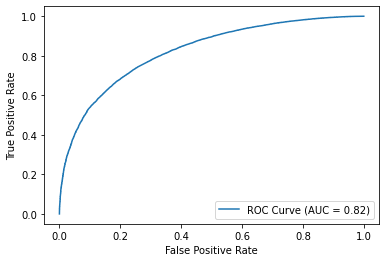

In [21]:
# ROC curve for fresh reviews
preds = model.predict(X_test)[:, 1]

from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(labels, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve')
display.plot()
plt.show()

In [22]:
# do this because otherwise the roc curve is the wrong way (line goes below the diagonal)
reversed_labels = 1-labels
reversed_preds = 1-preds

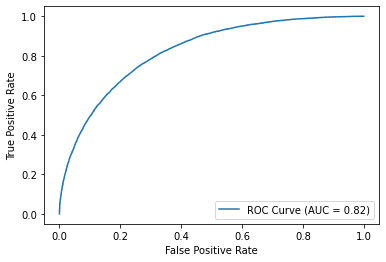

In [28]:
# roc curve for rotten reviews
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(reversed_labels, reversed_preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve')
display.plot()
plt.show()